No handles with labels found to put in legend.


[10.99887742  2.95656689  2.1423263   3.59688576  1.18803215  1.27222009
  8.6228275   3.24325899  6.6376825   1.42863284  1.47048336  1.06497431
  4.05028047  1.90748963  1.22347142  1.16860657  2.95048003  4.52617124
  1.39377904  2.43066005]
inf


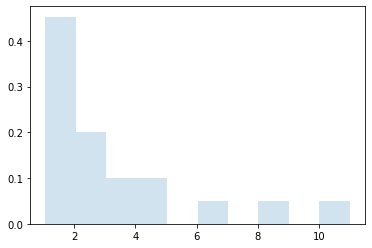

In [3]:
# Power law distribution ( the pareto distribution)
from scipy.stats import pareto
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import PIL

fig, ax = plt.subplots(1, 1)
b = 1
r = pareto.rvs(b, size=20)

print(r) # vector of quantities
print(pareto.mean(b, loc=0, scale=1)) # mean

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
# Homogeneously mixing: Uniform NxN
# compare the 

# what power is when a transition to homogeneously mixing occurs?

# (rcos(theta), rsin(theta)), r sim pareto, theta sim uniform


In [4]:
math.ceil(pareto.rvs(b=0.5, size=1)[0])

20

In [14]:
class Individual:
    
    
    """
    Individuals (Ind) Class
    Class Attributes:
    state: str, 'S', 'I', or 'R'
    locX: int, x-coordinate location
    locY: int, y-coordinate location
    neigh: list of pointers to its neighbors within distance L
    """
    
    """
    Class Attributes:
    state: str, 'S', 'I', or 'R'
    locX: int, x-coordinate location
    locY: int, y-coordinate location
    """
    
    def __init__(self, locX, locY):
        # first placed on grid as S
        self.state = 'S'
        self.locX = locX
        self.locY = locY

    
"""
long_range(N, L, beta, gamma, timestep, initInfected)
simulate spreading behavior
INPUTS: int N, int L, float beta, float gamma, int timestep, int initInfected
"""

def long_range2(N, L, beta, gamma, initInfected, t, a):
    # a = power law rate.
    # initialize population
    # indexed s.t. pop[i][j] is individual with locX = i and locY = j
    pop = [[Individual(i,j) for i in range(N)] for j in range(N)]
    grid = PIL.Image.new(mode='RGB', size=(225,225), color=(0, 255, 0))
    pixels = grid.load()
    
    
    # preallocate lists
    # infected: list of pointers to infected individuals
    infected = []
    # numinfected: used to track # of infected at each timestep
    numInfected = []
    
    """
    # choose random starting infection site and # of initial infections
    for k in range(initInfected):
        xInit = random.randint(0, N-1)
        yInit = random.randint(0, N-1)
        pop[xInit][yInit].state = 'I'
        infected.append(pop[xInit][yInit])
        pixels[xInit, yInit] = (255,0,0)
    
    """
    # or pick a starting infection site
    xInit = 112
    yInit = 112
    pop[xInit][yInit].state = 'I'
    infected.append(pop[xInit][yInit])
    pixels[xInit, yInit] = (255,0,0)
    
    
    # set numInfected[0] as initInfected
    numInfected.append(initInfected)
    grid.save('initGrid.jpg')
    
    # run spreading simulation for t timesteps
    # or run simulation until no more infected individuals remain
    timestep = 0
    for t in range(t):
    #while len(infected) != 0:
        timestep = timestep + 1
        # for each timestep, track new infections and recoveries 
        # using list recovered newInfected
        recovered = []
        newInfected = []
        # for each infected individual
        for i in range(len(infected)):
            
            # infect or recover at given probabilities
            s = random.uniform(0, beta + gamma)
            
            # infect
            if s >= gamma:
                
                # randomly choosing a neighbor somewhere in the population using a power law distribution.
        
                # choose to go L or R.
                leftright = random.randint(0, 1)
                if leftright == 0: # go left
                    xRand = infected[i].locX - math.ceil(pareto.rvs(a, size=1)[0]) # find another way to generate a rv that follows a power law. 
                else: # go right
                    xRand = infected[i].locX + math.ceil(pareto.rvs(a, size=1)[0])
                
                # choose to go up or down.
                updown = random.randint(0, 1)
                if updown == 0: # go up
                    yRand = infected[i].locY + math.ceil(pareto.rvs(a, size=1)[0])
                else: # go down
                    yRand = infected[i].locY - math.ceil(pareto.rvs(a, size=1)[0])
                      
                # mod NxN (list indexed from 0 to N-1)
                if xRand > N-1:
                    tempX = xRand % (N-1)
                    xRand = tempX
                    
                if yRand > N-1:
                    tempY = yRand % (N-1)
                    yRand = tempY
                    
                if xRand < 0:
                    tempX = -xRand % (N-1)
                    xRand = -tempX
                    
                if yRand < 0:
                    tempY = -yRand % (N-1)
                    yRand = -tempY
                
                # if chosen neighbor is S, then infect and add to 
                # list of infected
                if pop[xRand][yRand].state == 'S':
                    pop[xRand][yRand].state = 'I'
                    newInfected.append(pop[xRand][yRand])
                    
                   
                # remove
                #elif s < gamma:
                #    infected[i].state = 'R'
                #    recovered.append(infected[i])

                # SIS model, return to S
                elif s < gamma:
                    infected[i].state = 'S'
                    recovered.append(infected[i])

        for i in recovered:
            pixels[i.locX, i.locY] = (0,0,0)
        # after infecting/removing
        updateInfected = []
        
        for j in range(len(infected)):
            if infected[j].state == 'I':
                updateInfected.append(infected[j])
                    
    
        # append new infections from timestep to list infected
        infected = updateInfected + newInfected
        for i in infected:
            pixels[i.locX, i.locY] = (255,0,0)
        
        # append total number of infecteds to numInfected
        numInfected.append(len(infected))
        
        if timestep <= 50 and timestep % 5 == 0:
            grid.save(f'timestep{timestep}.jpg')
            print(len(infected))
        
    
    grid.save('finalGrid.jpg')
        
    return (numInfected)

In [15]:
if __name__ == "__main__":
    N = 225 # 
    L = 15
    beta = 2.5
    gamma = 1
    t = 100
    alpha = 1/3 # power law rate
    # if choosing a specific starting infection site, chose initInfected that
    # is a square; 9, 16, 25, etc.
    initInfected = 1
    #for i in range(len(beta)):
    infections = long_range2(N, L, beta, gamma, initInfected, t, alpha)
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(infections, label='I')
    ax.legend(loc='upper right')
    plt.title('Long Range # Infected per Timestep')
    plt.xlabel('Timesteps')
    plt.ylabel('# of Infected Individuals')       
    plt.savefig('long_range.png', bbox_inches='tight')
    plt.close('all')

19
287
3925
29850


KeyboardInterrupt: 

In [ ]:
# 1/4 looks like homogeneously mixing case
# 1/2 slight localization
# 1 very localized spread.